In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1. EDA

In [2]:
file_path = 'ipek-uzun-cs210.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

df = df.dropna()

df['Countries'] = df['Countries'].apply(lambda x: ', '.join([country.strip("[]").strip().strip("'") for country in x.split(',')]))
# Apply strip operations to clean the 'Genres' column
df['Genres'] = df['Genres'].apply(lambda x: ', '.join([genre.strip("[]").strip().strip("'") for genre in x.split(',')]))
df['Spoken_Languages'] = df['Spoken_Languages'].apply(lambda x: ', '.join([lang.strip("[]").strip().strip("'") for lang in x.split(',')]))
# Apply strip operations to clean the 'Cast' column
df['Cast'] = df['Cast'].apply(lambda x: ', '.join([actors.strip("[]").strip().strip("'") for actors in x.split(',')]))
df['Studios'] = df['Studios'].apply(lambda x: ', '.join([studio.strip("[]").strip().strip("'") for studio in x.split(',')]))


# Display the first few rows of the DataFrame
display(df.head())

,Film_title,Release_year,Director,Genres,Owner_rating,Average_rating,Runtime,Countries,Original_Language,Spoken_Languages,Watches,List_Appearances,Likes,Cast,Studios,Letterboxd URL
0,Last Call for Istanbul,2023,Gönenç Uyanık,"Drama, Romance",3.0,2.30,91.0,Turkey,Turkish,"Turkish, English",14586,794,797,"Beren Saat, Kıvanç Tatlıtuğ, Senan Kara, Zihan...","OGM Pictures, PToT Film",https://letterboxd.com//film/last-call-for-ist...
1,Love Likes Coincidences,2011,Ömer Faruk Sorak,"Romance, Drama",4.0,3.24,118.0,Turkey,Turkish,Turkish,19561,886,1486,"Mehmet Günsür, Belçim Bilgin, Altan Erkekli, A...",Böcek Yapım,https://letterboxd.com//film/love-likes-coinci...
2,The Chorus,2004,Christophe Barratier,Drama,4.5,3.91,97.0,"France, Germany, Switzerland",French,French,102641,13540,24095,"Gérard Jugnot, François Berléand, Kad Merad, J...","Galatée Films, Pathé Renn Productions, France ...",https://letterboxd.com//film/the-chorus/
3,The Social Dilemma,2020,Jeff Orlowski,"Documentary, Drama",3.0,3.23,94.0,USA,English,English,238562,19442,31794,"Skyler Gisondo, Kara Hayward, Vincent Kartheis...","Exposure Labs, Argent Pictures, The Space Program",https://letterboxd.com//film/the-social-dilemma/
4,The Intern,2015,Nancy Meyers,Comedy,2.5,3.24,121.0,USA,English,English,374599,27542,63124,"Robert De Niro, Anne Hathaway, Rene Russo, And...","Warner Bros. Pictures, RatPac Entertainment, W...",https://letterboxd.com//film/the-intern-2015/


In [3]:
# Display variable names (both dependent and independent)
print("\nColumn names:")
for col in df.columns:
    print(f"  - {col}")


Column names:
  - Film_title
  - Release_year
  - Director
  - Genres
  - Owner_rating
  - Average_rating
  - Runtime
  - Countries
  - Original_Language
  - Spoken_Languages
  - Watches
  - List_Appearances
  - Likes
  - Cast
  - Studios
  - Letterboxd URL


This part of the code shows Number of Films Released Each Decade: 

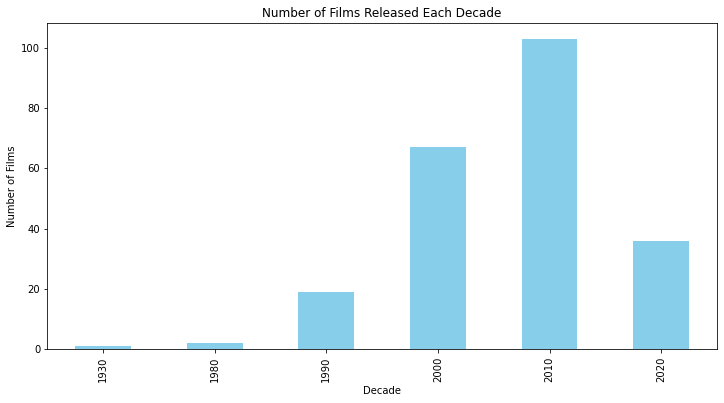

In [4]:
df['Decade'] = (df['Release_year'] // 10) * 10

# Count the number of films released each decade
films_per_decade = df.groupby('Decade').size()

# Plotting the distribution of film titles over the decades
plt.figure(figsize=(12, 6))
films_per_decade.plot(kind='bar', color='skyblue')
plt.title('Number of Films Released Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.show()


This part of the code shows Top 10 Most Frequent Genres: 

In [5]:
df_genres_split = df['Genres'].str.split(', ', expand=True)

# Reshape the DataFrame using the stack function to create a separate row for each genre
df_genres_split_stacked = df_genres_split.stack()

# Count the frequencies of each genre
genre_counts = df_genres_split_stacked.value_counts()

# Print the top 10 most frequent genres along with their frequencies
top_genres = genre_counts.head(10)
print("Top 10 Most Frequent Genres:")
print(top_genres)

Top 10 Most Frequent Genres:
Comedy             114
Drama               96
Adventure           75
Family              70
Romance             62
Animation           57
Fantasy             49
Science Fiction     25
Action              23
Thriller            14
dtype: int64


This plot shows distribution of Owner Ratings vs Average Ratings:

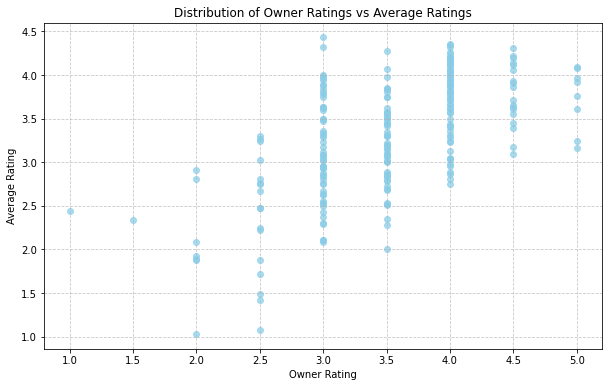

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Owner_rating'], df['Average_rating'], color='skyblue', alpha=0.7)
plt.title('Distribution of Owner Ratings vs Average Ratings')
plt.xlabel('Owner Rating')
plt.ylabel('Average Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



This part shows distribution of film runtimes & Longest and Shortest 10 Films:

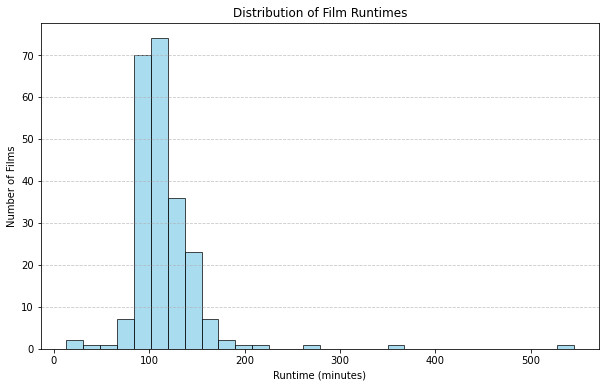

Shortest Films:


,Film_title,Runtime
201,Puss in Boots: The Three Diablos,13.0
33,Angela's Christmas,30.0
34,Angela's Christmas Wish,47.0
32,Euphoria: Trouble Don't Last Always,57.0
11,Inside the Mind of a Cat,67.0
197,The Nightmare Before Christmas,76.0
157,Corpse Bride,77.0
126,Babies,79.0
168,Garfield,80.0
45,Toy Story,81.0



Longest Films:


,Film_title,Runtime
14,Maid,545.0
63,Gilmore Girls: A Year in the Life,360.0
23,Anatomy of a Scandal,270.0
37,Unorthodox,213.0
217,Titanic,194.0
194,Oppenheimer,181.0
210,The Batman,177.0
83,Interstellar,169.0
55,The Curious Case of Benjamin Button,166.0
219,Avatar,162.0


In [7]:

# Analyze the distribution of film runtimes
plt.figure(figsize=(10, 6))
plt.hist(df['Runtime'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Film Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Films')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Identify outliers based on percentiles
runtime_percentiles = df['Runtime'].describe(percentiles=[0.25, 0.75, 0.95])

# Categorize films as short, normal, or long based on percentiles
short_threshold = runtime_percentiles['25%']
long_threshold = runtime_percentiles['95%']

# Create a new column 'Runtime_Category'
df['Runtime_Category'] = pd.cut(df['Runtime'], bins=[float('-inf'), short_threshold, long_threshold, float('inf')],
                                labels=['Short', 'Normal', 'Long'], include_lowest=True)

# Sort films based on runtime
shortest_films = df[df['Runtime_Category'] == 'Short'].sort_values(by='Runtime').head(10)
longest_films = df[df['Runtime_Category'] == 'Long'].sort_values(by='Runtime', ascending=False).head(10)

# Output the shortest and longest films
print("Shortest Films:")
display(shortest_films[['Film_title', 'Runtime']])

print("\nLongest Films:")
display(longest_films[['Film_title', 'Runtime']])

This part shows Most Frequently Appearing Actors/Actresses:

In [8]:
df['Cast'] = df['Cast'].astype(str)

# Split the cast if it is in a delimited format (e.g., comma-separated)

df['Cast'] = df['Cast'].str.split(',')

# Use the explode function to create a separate row for each cast member
df_cast = df.explode('Cast')

# Count the frequencies of each actor/actress
frequent_cast = df_cast['Cast'].value_counts()

# Output the top 10 most frequently appearing actors/actresses and their frequencies
top_cast = frequent_cast.head(10)
print("Top 10 Most Frequently Appearing Actors/Actresses and Their Frequencies:")
print(top_cast)

Top 10 Most Frequently Appearing Actors/Actresses and Their Frequencies:
 John Ratzenberger    14
 Mickie McGowan       13
 Jess Harnell         13
 Jan Rabson           13
 Conrad Vernon        12
 Laraine Newman       12
 Bob Bergen           11
 Sherry Lynn          11
 Danny Mann           10
 John Cygan           10
Name: Cast, dtype: int64


This part makes correlation analysis

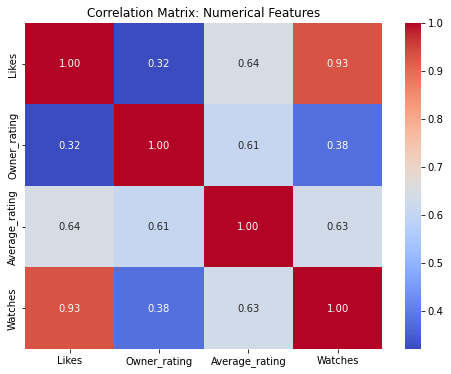

In [9]:
# Select the numerical features for correlation analysis
numerical_features = ['Likes', 'Owner_rating', 'Average_rating', 'Watches']

# Create a correlation matrix
correlation_matrix = df[numerical_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Numerical Features')
plt.show()

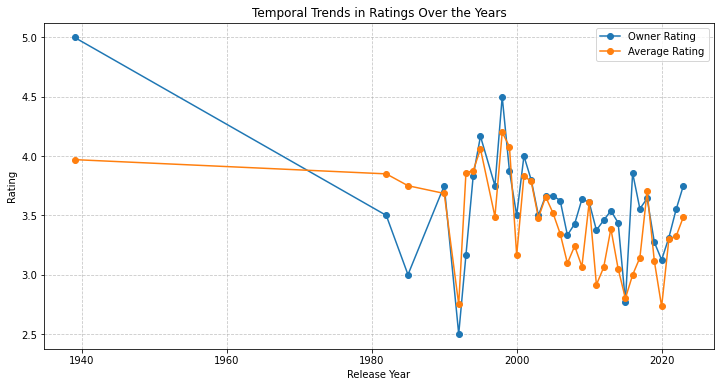

In [10]:
# Group by release year and calculate the mean of owner and average ratings
ratings_by_year = df.groupby('Release_year')[['Owner_rating', 'Average_rating']].mean()

# Plotting temporal trends
plt.figure(figsize=(12, 6))
plt.plot(ratings_by_year.index, ratings_by_year['Owner_rating'], label='Owner Rating', marker='o')
plt.plot(ratings_by_year.index, ratings_by_year['Average_rating'], label='Average Rating', marker='o')
plt.title('Temporal Trends in Ratings Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<Figure size 1152x576 with 0 Axes>

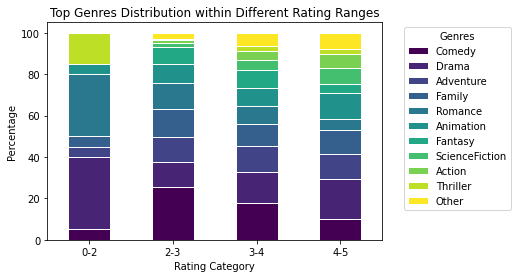

In [11]:


# Preprocess the 'Genres' column
df['Genres'] = df['Genres'].astype(str).str.replace("[", "", regex=True).str.replace("]", "", regex=True).str.replace("'", "", regex=True).str.replace(" ", "", regex=True)


df['Genres'] = df['Genres'].str.split(',')


# Create a new column 'Rating_Category' based on average ratings
df['Rating_Category'] = pd.cut(df['Average_rating'], bins=[0, 2, 3, 4, 5], labels=['0-2', '2-3', '3-4', '4-5'])

# Count the occurrences of each genre within each rating category
genre_rating_counts = df.explode('Genres').groupby(['Rating_Category', 'Genres']).size().unstack().fillna(0)

# Keep only the top N genres (adjust N as needed)
top_genres = genre_rating_counts.sum(axis=0).nlargest(10).index
df_top_genres = genre_rating_counts[top_genres].copy()  # Use .copy() to create a copy of the DataFrame

# Group less frequent genres into 'Other' category using .loc
df_top_genres.loc[:, 'Other'] = genre_rating_counts.drop(columns=top_genres).sum(axis=1)

# Normalize the counts to create a percentage stacked bar chart
genre_rating_percentages = df_top_genres.div(df_top_genres.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
plt.figure(figsize=(16, 8))
genre_rating_percentages.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='white')
plt.title('Top Genres Distribution within Different Rating Ranges')
plt.xlabel('Rating Category')
plt.ylabel('Percentage')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()




In [12]:

# Find the row with the maximum value in the "watches" column
max_watches_row = df[df['Watches'] == df['Watches'].max()]

# Display the result
display(max_watches_row)


,Film_title,Release_year,Director,Genres,Owner_rating,Average_rating,Runtime,Countries,Original_Language,Spoken_Languages,Watches,List_Appearances,Likes,Cast,Studios,Letterboxd URL,Decade,Runtime_Category,Rating_Category
208,Joker,2019,Todd Phillips,"[Crime, Drama, Thriller]",4.0,3.83,122.0,"Canada, USA",English,English,3296758,268764,1345995,"[Joaquin Phoenix, Robert De Niro, Zazie Beet...","Warner Bros. Pictures, Joint Effort, Village R...",https://letterboxd.com//film/joker-2019/,2010,Normal,3-4


Number of missing runtimes: 0


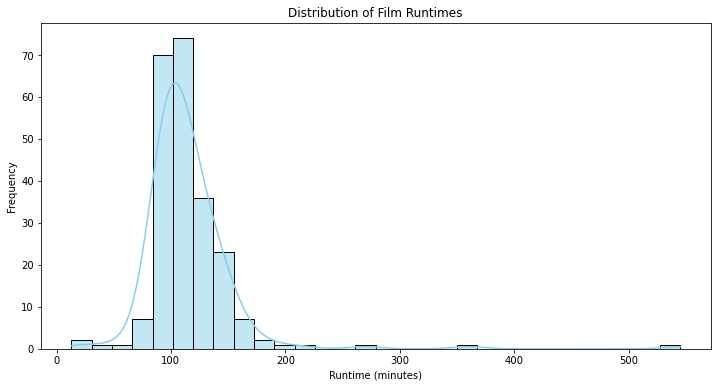

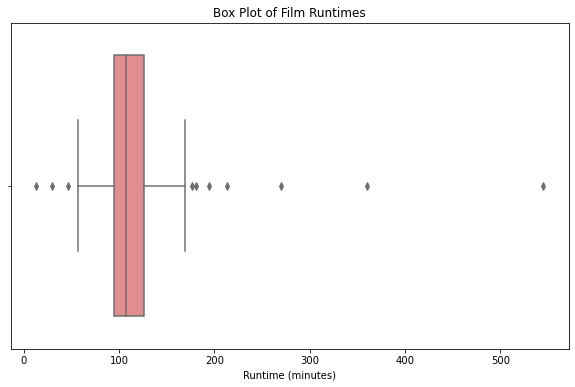

In [13]:
# Check for missing values in the 'Runtime' column
missing_runtimes = df['Runtime'].isnull().sum()
print(f"Number of missing runtimes: {missing_runtimes}")

# Drop rows with missing runtimes for EDA 
df_cleaned = df.dropna(subset=['Runtime'])

# Plot a histogram of film runtimes
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Runtime'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Film Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot a box plot of film runtimes
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Runtime'], color='lightcoral')
plt.title('Box Plot of Film Runtimes')
plt.xlabel('Runtime (minutes)')
plt.show()


In [14]:
# Apply strip operations to clean the 'Countries' column
df['Countries'] = df['Countries'].apply(lambda x: ', '.join([country.strip("[]").strip().strip("'") for country in x.split(',')]))

# Split countries when there are multiple and create a list of countries
all_countries = [country.strip() for countries in df['Countries'] for country in countries.split(',')]

# Count the occurrences of each country
country_counts = pd.Series(all_countries).value_counts()

# Print the top 10 most watched countries
print("Top Watched Country:")
print("-------------------------------")
for i, (country, count) in enumerate(country_counts.head(1).iteritems(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i}. {country}: {count} films ({percentage:.2f}%)")

Top Watched Country:
-------------------------------
1. USA: 196 films (85.96%)


## Hypothesis Testing

Hypotheses: I tend to watch films that are widely popular or have gained significant attention in terms of viewership and rating. This could be reflected in the films with the highest 'Watches',  count in my dataset. The assumption is that popular films, as indicated by a high number of watches, are more likely to align with my viewing preferences."


Null Hypothesis (H0):
"I do not have a preference for watching popular films, and the number of watches for the films I watch is not significantly different from the overall average number of watches in the dataset."

Alternative Hypothesis (H1):
"I tend to watch more popular films, and the number of watches for the films I watch is significantly higher than the overall average number of watches in the dataset."





In [15]:
file_path2 = 'letterboxd-top-500.csv'

# Read the CSV file into a DataFrame
df2 = pd.read_csv(file_path2)



df2['Countries'] = df2['Countries'].apply(lambda x: ', '.join([country.strip("[]").strip().strip("'") for country in x.split(',')]))
# Apply strip operations to clean the 'Genres' column
df2['Genres'] = df2['Genres'].apply(lambda x: ', '.join([genre.strip("[]").strip().strip("'") for genre in x.split(',')]))
df2['Spoken_Languages'] = df2['Spoken_Languages'].apply(lambda x: ', '.join([lang.strip("[]").strip().strip("'") for lang in x.split(',')]))
# Apply strip operations to clean the 'Cast' column
df2['Cast'] = df2['Cast'].apply(lambda x: ', '.join([actors.strip("[]").strip().strip("'") for actors in x.split(',')]))
df2['Studios'] = df2['Studios'].apply(lambda x: ', '.join([studio.strip("[]").strip().strip("'") for studio in x.split(',')]))

display(df2)

,Film_title,Release_year,Director,Genres,Owner_rating,Average_rating,Runtime,Countries,Original_Language,Spoken_Languages,Watches,List_Appearances,Likes,Cast,Studios,Letterboxd URL
0,Parasite,2019,Bong Joon-ho,"Comedy, Thriller, Drama",4.0,4.57,133,South Korea,Korean,"Korean, English, German",3339851,476676,1936926,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Cho...",Barunson E&A,https://letterboxd.com//film/parasite-2019/
1,Barbie,2023,Greta Gerwig,"Comedy, Fantasy, Adventure",5.0,3.93,114,"UK, USA",English,English,2768128,355432,1202011,"Margot Robbie, Ryan Gosling, America Ferrera, ...","LuckyChap Entertainment, Heyday Films, NB/GG P...",https://letterboxd.com//film/barbie/
2,Everything Everywhere All at Once,2022,"Daniel Scheinert, Daniel Kwan","Science Fiction, Action, Adventure",3.5,4.32,140,USA,English,"English, Cantonese, Chinese",2459617,446358,1257132,"Michelle Yeoh, Stephanie Hsu, Ke Huy Quan, Jam...","A24, IAC Films, AGBO, Ley Line Entertainment, ...",https://letterboxd.com//film/everything-everyw...
3,Fight Club,1999,David Fincher,Drama,4.0,4.27,139,"Germany, USA",English,English,3208653,369024,1451288,"Edward Norton, Brad Pitt, Helena Bonham Carter...","Fox 2000 Pictures, Regency Enterprises, The Li...",https://letterboxd.com//film/fight-club/
4,Joker,2019,Todd Phillips,"Crime, Drama, Thriller",NaN,3.83,122,"Canada, USA",English,English,3300560,269044,1347571,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...","Warner Bros. Pictures, Joint Effort, Village R...",https://letterboxd.com//film/joker-2019/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Man of Steel,2013,Zack Snyder,"Action, Adventure, Science Fiction",3.5,2.97,143,"UK, USA",English,English,894007,112641,129791,"Henry Cavill, Amy Adams, Michael Shannon, Dian...","DC Entertainment, Syncopy, Peters Entertainmen...",https://letterboxd.com//film/man-of-steel/
496,Marie Antoinette,2006,Sofia Coppola,"History, Drama",NaN,3.71,123,"France, Japan, Canada, USA",English,"English, French, Latin",488859,92417,146967,"Kirsten Dunst, Jason Schwartzman, Steve Coogan...","Pricel, Columbia Pictures, TFC, American Zoetrope",https://letterboxd.com//film/marie-antoinette-...
497,Possession,2002,Neil LaBute,"Romance, Mystery, Drama",NaN,2.93,102,"UK, USA",English,English,4394,1086,370,"Gwyneth Paltrow, Aaron Eckhart, Jeremy Northam...","Focus Features, Warner Bros. Pictures, Baltimo...",https://letterboxd.com//film/possession-2002/
498,Despicable Me,2010,"Pierre Coffin, Chris Renaud","Comedy, Animation, Family",NaN,3.49,95,USA,English,English,1170557,53729,174882,"Steve Carell, Miranda Cosgrove, Dana Gaier, El...","Illumination, Universal Pictures",https://letterboxd.com//film/despicable-me/


In [16]:
from scipy import stats



# Check if the films in your watched dataset are in the top 500
common_films = df[df['Film_title'].isin(df2['Film_title'])]

# Extract the 'Watches' columns for the common films
your_watches = common_films['Watches']
top500_watches = df2[df2['Film_title'].isin(common_films['Film_title'])]['Watches']

# Perform a matched pair t-test
t_stat, p_value = stats.ttest_rel(your_watches, top500_watches)

# Check the p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is significant evidence that you watch more popular films.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that you watch more popular films.")
print(p_value)

Fail to reject the null hypothesis. There is no significant evidence that you watch more popular films.
0.9813872563472347


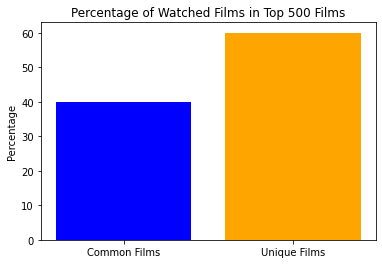

In [17]:
# Check if the films in your watched dataset are in the top 500
common_films = df[df['Film_title'].isin(df2['Film_title'])]

# Calculate the percentage of common films
percentage_common = len(common_films) / len(df) * 100

# Calculate the percentage of unique films in your watched dataset
percentage_unique = 100 - percentage_common

# Create a bar chart
labels = ['Common Films', 'Unique Films']
percentages = [percentage_common, percentage_unique]

plt.bar(labels, percentages, color=['blue', 'orange'])
plt.ylabel('Percentage')
plt.title('Percentage of Watched Films in Top 500 Films')
plt.show()

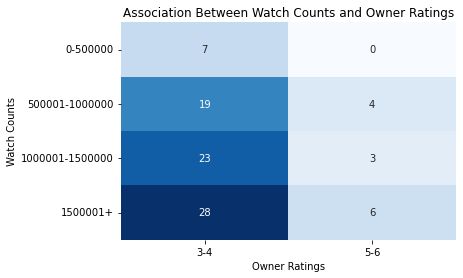

0.6142179401080876


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency



# Check if the films in your watched dataset are in the top 500
common_films = df[df['Film_title'].isin(df2['Film_title'])]

# Create categorical bins for watch counts and owner ratings
watch_count_bins = pd.cut(common_films['Watches'],bins=[500000, 1000000, 1500000, 2000000, float('inf')], labels=['0-500000', '500001-1000000', '1000001-1500000', '1500001+'])
owner_rating_bins = pd.cut(common_films['Owner_rating'], bins=[0, 2, 4, 6, 8, 10], labels=['0-2', '3-4', '5-6', '7-8', '9-10'])

# Create a contingency table
contingency_table = pd.crosstab(index=watch_count_bins, columns=owner_rating_bins)

# Perform a chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Visualize the contingency table using a heatmap
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Owner Ratings')
plt.ylabel('Watch Counts')
plt.title('Association Between Watch Counts and Owner Ratings')
plt.show()

print(p_value)


## Machine Learning

In [19]:
# Apply strip operations to clean the 'Countries' column
df['Countries'] = df['Countries'].apply(lambda x: ', '.join([country.strip("[]").strip().strip("'") for country in x.split(',')]))


# Keep only the first language in the 'Spoken_Languages' column
df['Spoken_Languages'] = df['Spoken_Languages'].apply(lambda x: x.split(',')[0].strip("[]").strip().strip("'"))
display(df)

,Film_title,Release_year,Director,Genres,Owner_rating,Average_rating,Runtime,Countries,Original_Language,Spoken_Languages,Watches,List_Appearances,Likes,Cast,Studios,Letterboxd URL,Decade,Runtime_Category,Rating_Category
0,Last Call for Istanbul,2023,Gönenç Uyanık,"[Drama, Romance]",3.0,2.30,91.0,Turkey,Turkish,Turkish,14586,794,797,"[Beren Saat, Kıvanç Tatlıtuğ, Senan Kara, Z...","OGM Pictures, PToT Film",https://letterboxd.com//film/last-call-for-ist...,2020,Short,2-3
1,Love Likes Coincidences,2011,Ömer Faruk Sorak,"[Romance, Drama]",4.0,3.24,118.0,Turkey,Turkish,Turkish,19561,886,1486,"[Mehmet Günsür, Belçim Bilgin, Altan Erkekli...",Böcek Yapım,https://letterboxd.com//film/love-likes-coinci...,2010,Normal,3-4
2,The Chorus,2004,Christophe Barratier,[Drama],4.5,3.91,97.0,"France, Germany, Switzerland",French,French,102641,13540,24095,"[Gérard Jugnot, François Berléand, Kad Merad...","Galatée Films, Pathé Renn Productions, France ...",https://letterboxd.com//film/the-chorus/,2000,Normal,3-4
3,The Social Dilemma,2020,Jeff Orlowski,"[Documentary, Drama]",3.0,3.23,94.0,USA,English,English,238562,19442,31794,"[Skyler Gisondo, Kara Hayward, Vincent Karth...","Exposure Labs, Argent Pictures, The Space Program",https://letterboxd.com//film/the-social-dilemma/,2020,Short,3-4
4,The Intern,2015,Nancy Meyers,[Comedy],2.5,3.24,121.0,USA,English,English,374599,27542,63124,"[Robert De Niro, Anne Hathaway, Rene Russo, ...","Warner Bros. Pictures, RatPac Entertainment, W...",https://letterboxd.com//film/the-intern-2015/,2010,Normal,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,The Pianist,2002,Roman Polanski,"[Drama, War]",4.0,4.36,150.0,"France, Germany, Poland, UK",English,English,828858,114292,247756,"[Adrien Brody, Thomas Kretschmann, Frank Fin...","Canal+ Polska, Bac Films, Heritage Films, Stud...",https://letterboxd.com//film/the-pianist/,2000,Normal,4-5
226,Star Wars: The Rise of Skywalker,2019,J.J. Abrams,"[Adventure, Action, ScienceFiction]",3.0,2.37,142.0,USA,English,English,1288149,176336,169845,"[Carrie Fisher, Mark Hamill, Daisy Ridley, ...","Lucasfilm Ltd., Bad Robot",https://letterboxd.com//film/star-wars-the-ris...,2010,Normal,2-3
227,Fifty Shades Darker,2017,James Foley,"[Drama, Romance]",2.5,1.88,118.0,"Japan, USA",English,English,157643,13631,10426,"[Dakota Johnson, Jamie Dornan, Eric Johnson,...","Universal Pictures, Michael De Luca Production...",https://letterboxd.com//film/fifty-shades-darker/,2010,Normal,0-2
228,Spider-Man: Homecoming,2017,Jon Watts,"[Action, Drama, Adventure, ScienceFiction]",3.0,3.47,133.0,USA,English,English,2293039,300587,643009,"[Tom Holland, Michael Keaton, Robert Downey ...","Marvel Studios, Pascal Pictures, LStar Capital...",https://letterboxd.com//film/spider-man-homeco...,2010,Normal,3-4


In [20]:

countries_map= {'USA': 1,
              'UK': 2,
              'Turkey': 3, 'Canada': 4,'Germany':  5, 'Others': 6 }

language_map= {'English': 1,
              'French': 2,
              'Turkish': 3, 'Spanish': 4,'Italian':  5,'Others': 6 }



df['Countries'] = df['Countries'].map(countries_map)
df['Spoken_Languages'] = df['Spoken_Languages'].map(language_map)

print("First 5 rows from the preprocessed training dataset:")
display(df.head())

First 5 rows from the preprocessed training dataset:


,Film_title,Release_year,Director,Genres,Owner_rating,Average_rating,Runtime,Countries,Original_Language,Spoken_Languages,Watches,List_Appearances,Likes,Cast,Studios,Letterboxd URL,Decade,Runtime_Category,Rating_Category
0,Last Call for Istanbul,2023,Gönenç Uyanık,"[Drama, Romance]",3.0,2.30,91.0,3.0,Turkish,3.0,14586,794,797,"[Beren Saat, Kıvanç Tatlıtuğ, Senan Kara, Z...","OGM Pictures, PToT Film",https://letterboxd.com//film/last-call-for-ist...,2020,Short,2-3
1,Love Likes Coincidences,2011,Ömer Faruk Sorak,"[Romance, Drama]",4.0,3.24,118.0,3.0,Turkish,3.0,19561,886,1486,"[Mehmet Günsür, Belçim Bilgin, Altan Erkekli...",Böcek Yapım,https://letterboxd.com//film/love-likes-coinci...,2010,Normal,3-4
2,The Chorus,2004,Christophe Barratier,[Drama],4.5,3.91,97.0,NaN,French,2.0,102641,13540,24095,"[Gérard Jugnot, François Berléand, Kad Merad...","Galatée Films, Pathé Renn Productions, France ...",https://letterboxd.com//film/the-chorus/,2000,Normal,3-4
3,The Social Dilemma,2020,Jeff Orlowski,"[Documentary, Drama]",3.0,3.23,94.0,1.0,English,1.0,238562,19442,31794,"[Skyler Gisondo, Kara Hayward, Vincent Karth...","Exposure Labs, Argent Pictures, The Space Program",https://letterboxd.com//film/the-social-dilemma/,2020,Short,3-4
4,The Intern,2015,Nancy Meyers,[Comedy],2.5,3.24,121.0,1.0,English,1.0,374599,27542,63124,"[Robert De Niro, Anne Hathaway, Rene Russo, ...","Warner Bros. Pictures, RatPac Entertainment, W...",https://letterboxd.com//film/the-intern-2015/,2010,Normal,3-4


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle


# Shuffle the dataset
df = shuffle(df, random_state=42)

# Define the target variable 'y' (like or dislike)
df['Liked'] = df['Owner_rating'].apply(lambda x: 1 if x >= 3.5 else 0)

# Separate dependent variable X and independent variable y
X = df[['Average_rating', 'Watches', 'Runtime',]]  # Add more features as needed
y = df['Liked']

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier 
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 73.91%


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier



# Define the hyperparameters and their possible values to explore
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20]
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_dt_model.score(X_test, y_test)
print(f"Test Accuracy with Best Model: {test_accuracy}")


Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 2}
Test Accuracy with Best Model: 0.7391304347826086


In [23]:
# Use the trained model to predict 'Liked' in top500df
top500_predictions = clf.predict(df2[['Average_rating', 'Watches', 'Runtime']])  # Add more features as needed

# Add the predictions to the top500df DataFrame
df2['Predicted_Liked'] = top500_predictions

display(df2)


,Film_title,Release_year,Director,Genres,Owner_rating,Average_rating,Runtime,Countries,Original_Language,Spoken_Languages,Watches,List_Appearances,Likes,Cast,Studios,Letterboxd URL,Predicted_Liked
0,Parasite,2019,Bong Joon-ho,"Comedy, Thriller, Drama",4.0,4.57,133,South Korea,Korean,"Korean, English, German",3339851,476676,1936926,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Cho...",Barunson E&A,https://letterboxd.com//film/parasite-2019/,1
1,Barbie,2023,Greta Gerwig,"Comedy, Fantasy, Adventure",5.0,3.93,114,"UK, USA",English,English,2768128,355432,1202011,"Margot Robbie, Ryan Gosling, America Ferrera, ...","LuckyChap Entertainment, Heyday Films, NB/GG P...",https://letterboxd.com//film/barbie/,1
2,Everything Everywhere All at Once,2022,"Daniel Scheinert, Daniel Kwan","Science Fiction, Action, Adventure",3.5,4.32,140,USA,English,"English, Cantonese, Chinese",2459617,446358,1257132,"Michelle Yeoh, Stephanie Hsu, Ke Huy Quan, Jam...","A24, IAC Films, AGBO, Ley Line Entertainment, ...",https://letterboxd.com//film/everything-everyw...,1
3,Fight Club,1999,David Fincher,Drama,4.0,4.27,139,"Germany, USA",English,English,3208653,369024,1451288,"Edward Norton, Brad Pitt, Helena Bonham Carter...","Fox 2000 Pictures, Regency Enterprises, The Li...",https://letterboxd.com//film/fight-club/,1
4,Joker,2019,Todd Phillips,"Crime, Drama, Thriller",NaN,3.83,122,"Canada, USA",English,English,3300560,269044,1347571,"Joaquin Phoenix, Robert De Niro, Zazie Beetz, ...","Warner Bros. Pictures, Joint Effort, Village R...",https://letterboxd.com//film/joker-2019/,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Man of Steel,2013,Zack Snyder,"Action, Adventure, Science Fiction",3.5,2.97,143,"UK, USA",English,English,894007,112641,129791,"Henry Cavill, Amy Adams, Michael Shannon, Dian...","DC Entertainment, Syncopy, Peters Entertainmen...",https://letterboxd.com//film/man-of-steel/,0
496,Marie Antoinette,2006,Sofia Coppola,"History, Drama",NaN,3.71,123,"France, Japan, Canada, USA",English,"English, French, Latin",488859,92417,146967,"Kirsten Dunst, Jason Schwartzman, Steve Coogan...","Pricel, Columbia Pictures, TFC, American Zoetrope",https://letterboxd.com//film/marie-antoinette-...,1
497,Possession,2002,Neil LaBute,"Romance, Mystery, Drama",NaN,2.93,102,"UK, USA",English,English,4394,1086,370,"Gwyneth Paltrow, Aaron Eckhart, Jeremy Northam...","Focus Features, Warner Bros. Pictures, Baltimo...",https://letterboxd.com//film/possession-2002/,0
498,Despicable Me,2010,"Pierre Coffin, Chris Renaud","Comedy, Animation, Family",NaN,3.49,95,USA,English,English,1170557,53729,174882,"Steve Carell, Miranda Cosgrove, Dana Gaier, El...","Illumination, Universal Pictures",https://letterboxd.com//film/despicable-me/,0


In [24]:
predicted_liked_counts = df2['Predicted_Liked'].value_counts()

# Print the count of '1's in the 'Predicted_Liked' column
print("Number of '1's in Predicted_Liked column:", predicted_liked_counts.get(1, 0))


Number of '1's in Predicted_Liked column: 449


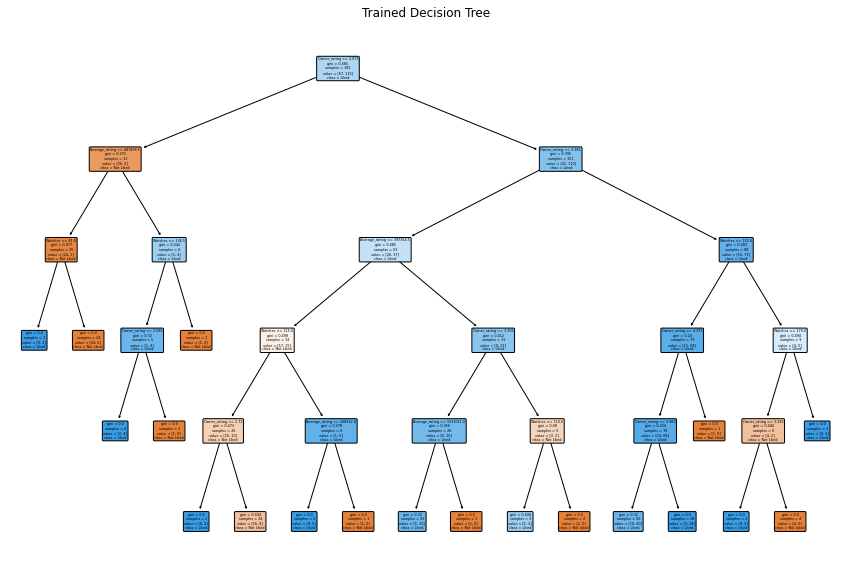

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Use the best hyperparameters from the GridSearchCV results
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

# Initialize the Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)

# Train the model on the entire training set
best_dt_model.fit(X_train, y_train)

# Plot the trained Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(best_dt_model, feature_names=['Owner_rating', 'Average_rating', 'Watches'], class_names=['Not Liked', 'Liked'], filled=True, rounded=True)
plt.title("Trained Decision Tree")
plt.show()


Test Accuracy with Trained Decision Tree: 0.7391304347826086


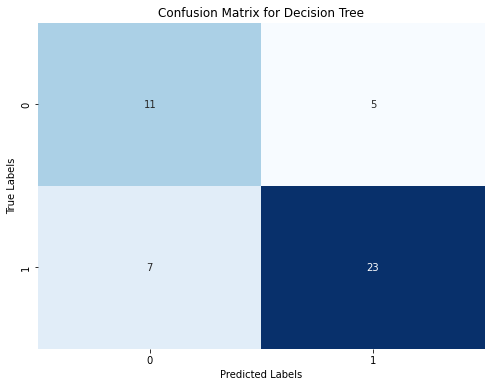

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Use the trained Decision Tree to predict labels for the test set
dt_predictions_test = best_dt_model.predict(X_test)

# Report the classification accuracy
test_accuracy_dt = accuracy_score(y_test, dt_predictions_test)
print(f"Test Accuracy with Trained Decision Tree: {test_accuracy_dt}")

# Plot the confusion matrix
conf_matrix_dt_test = confusion_matrix(y_test, dt_predictions_test)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()
